In [ ]:
%pip install tensorflow

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras import models ,layers


IMAGE_SIZE = 256
BATCH_SIZE= 32
CHANNELS = 3
EPOCHS  = 50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "drive/MyDrive/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 4629 files belonging to 5 classes.


In [ ]:
len(dataset.class_names)

5

In [ ]:
class_names = dataset.class_names

In [ ]:
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [ ]:
len(dataset)

145

(32, 256, 256, 3)
[1 3 1 3 2 1 2 3 2 2 1 3 3 2 2 3 2 0 3 0 2 0 2 1 2 3 0 3 2 1 0 3]
tf.Tensor(
[[[141. 130. 138.]
  [145. 134. 142.]
  [142. 131. 139.]
  ...
  [190. 183. 190.]
  [204. 197. 204.]
  [198. 191. 198.]]

 [[153. 142. 150.]
  [151. 140. 148.]
  [142. 131. 139.]
  ...
  [193. 186. 193.]
  [199. 192. 199.]
  [187. 180. 187.]]

 [[160. 149. 157.]
  [155. 144. 152.]
  [143. 132. 140.]
  ...
  [195. 188. 195.]
  [195. 188. 195.]
  [179. 172. 179.]]

 ...

 [[101.  93. 106.]
  [ 96.  88. 101.]
  [116. 108. 121.]
  ...
  [125. 113. 123.]
  [130. 118. 128.]
  [146. 134. 144.]]

 [[106.  98. 111.]
  [102.  94. 107.]
  [106.  98. 111.]
  ...
  [147. 135. 145.]
  [140. 128. 138.]
  [122. 110. 120.]]

 [[115. 107. 120.]
  [110. 102. 115.]
  [ 99.  91. 104.]
  ...
  [135. 123. 133.]
  [139. 127. 137.]
  [124. 112. 122.]]], shape=(256, 256, 3), dtype=float32)


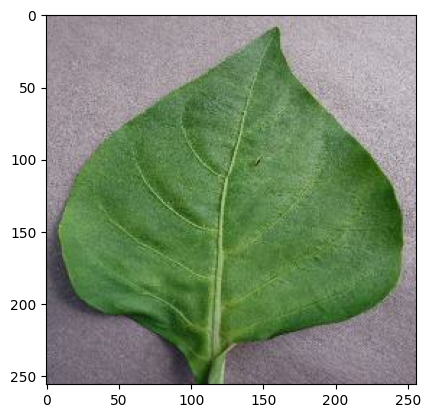

In [ ]:
import matplotlib.pyplot as plt

for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0])
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [ ]:
train_size = 0.8


len(dataset)*train_size

116.0

In [ ]:
train_ds = dataset.take( int(len(dataset)*train_size))

In [ ]:
test_ds= dataset.skip(int(len(dataset)*train_size))

In [ ]:
val_size = 0.1
len(dataset)*val_size

14.5

In [ ]:
val_ds = test_ds.take(int(len(dataset)*val_size))
len(val_ds)

14

In [ ]:
test_ds = test_ds.skip(len(val_ds))
len(test_ds)

15

In [ ]:
def get_dataset_partitions_tf(ds , train_split =0.8 ,val_split= 0.1 , test_split=0.1 ,shuffle = True ,shuffle_size = 10000):
    assert (train_split + val_split + test_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size ,  seed = 12)

    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds , val_ds , test_ds

In [ ]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds) , len(val_ds) , len(test_ds)

(116, 14, 15)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

In [ ]:
# data_augmentation = tf.keras.Sequential([
#     layers.RandomRotation(factor=(-0.2, 0.2),
#         fill_mode='reflect',
#         interpolation='bilinear',
#         value_range=[0, 255]),
# ])

In [ ]:
n_classes = len(dataset.class_names)

model = models.Sequential([
layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
resize_and_rescale,

layers.Conv2D(32, (3,3), padding='same', activation='relu' , input_shape=(BATCH_SIZE ,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(128, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(n_classes, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,871,237 (64.36 MB)

 Trainable params: 16,871,237 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50,batch_size=BATCH_SIZE,verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


116/116 ━━━━━━━━━━━━━━━━━━━━ 689s 299ms/step - accuracy: 0.4738 - loss: 1.7897 - val_accuracy: 0.8421 - val_loss: 0.4428
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8804 - loss: 0.3148 - val_accuracy: 0.9497 - val_loss: 0.1588
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9471 - loss: 0.1632 - val_accuracy: 0.9222 - val_loss: 0.1995
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9427 - loss: 0.1605 - val_accuracy: 0.9680 - val_loss: 0.0836
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9751 - loss: 0.0767 - val_accuracy: 0.9405 - val_loss: 0.1509
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9624 - loss: 0.1136 - val_accuracy: 0.9657 - val_loss: 0.1187
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9863 - loss: 0.0400 - val_accuracy: 0.9771 - val_loss: 0.0619
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9648 - loss: 0.1061 - val_accurac

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50) , acc , label="Training Accuracy")
plt.plot(range(50) , val_acc , label="Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")



In [ ]:

import numpy as np

In [ ]:
for images_batch , labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print("First Image to Predict")
    plt.imshow(first_image )
    print("first image's actual label" , class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("Predicted label : " + class_names[list(batch_prediction[0]).index(max([element for element in batch_prediction[0]]))])

In [ ]:
def predict(model , img ):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array , 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class , confidence

In [ ]:
plt.figure(figsize=(15,15))

for images ,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3 ,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class  , confidence = predict(model ,images[i])
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class} \n Predicted:{predicted_class} \n Confidence: {confidence}")

        print(predicted_class , confidence)
        plt.axis("off")

In [ ]:
model.save("model_3.keras")

In [ ]:
for images ,labels in test_ds.take(1):
    images=images[0].numpy().astype('uint8')
    img_array = tf.keras.preprocessing.image.img_to_array(images)
    img_array = tf.expand_dims(img_array , 0)
    print(model.predict(img_array))

In [ ]:
for images ,labels in test_ds.take(1):
    print(model.predict(images[0].numpy().astype('uint8')))